# Individual Exam CtH | Analysing "Brand Twitter"

### Author: *Name* Leonards Leimanis

Be sure to check the assignment description on Canvas once more.

Handing in the notebook should be done in a `zip` file, together with any files you create. We request you to name the exam submission as "exam_name_studentname.zip" with your corresponding name. The data is presented in the `data` folder. Also, include the files containing the data when handing in your exam, as this helps us to check your code when re-running it. To check if we can run your notebook from top to bottom without receiving errors, try to clear all the output of the cells and rerun everything. This can be done automatically by clicking on `Runtime --> Restart and run all`.

Good luck!

# Introduction

For this assignment we will investigate the phenomenon of "*Brand Twitter*". While corporate communication is traditionally rather bland, in recent years a trend has emerged of brands communicating on social media in a far less formal way. Social media teams of certain brands have started use memes, edgy humour and an informal and personal style of writing, sometimes also engaging with other brand accounts in a way that is similar to how many Twitter users tweet and interact with each other. This phenomenon of corporate personhood has been called *Brand Twitter*.

In 2019, Vulture published a history of the phenomenon, just in case you find it interesting: https://www.vulture.com/2019/06/brand-twitter-jokes-history.html

For this assignment we will consider a group of brand accounts that are often considered part of *Brand Twitter*:

    * @Wendys - Wendy's
    * @PrimeVideo - Amazon Prime Video
    * @MerriamWebster - Merriam Webster
    * @BurgerKing - Burger King
    * @Netflix - Netflix US
    * @McDonalds - McDonald's
    * @DennysDiner - Denny's Diner

We thought it would be interesting to analyse the tweets of these brand accounts to learn more about this novel style of corporate communication and the ways corporations might be perceived as relatable people on social media.

# Data

The data can be found within the file `brand_tweets.csv`. This file contains twitter data on tweets (every row is one tweet) by these brands.

FYI: This data was acquired from Twitter using their API if you're interested, following the method from the optional Notebook 7.

*Please note: this dataset might contain content which could be considered as offensive. It is real unfiltered data directly from Twitter.*

# Tasks

We would like to look through some recent tweets of *Brand Twitter*, and be able to understand certain characteristics of their tweets. As these Twitter accounts represent major brands, one particularly interesting aspect of this dataset is the difference between regular tweets and tweets that are replies to other tweets, which could be replies to customers or other brands.

Make your code and results as pretty as possible, and feel free to use tabs and enumeration when printing text and formatting for the visualisations. 

This assignment is about getting familiar with Pandas' methods — we suggest going through the lecture and seminar notebooks on Pandas again. You can of course use any course material in this assignment!

You are not limited to the structure of the cells below with ` # Your code here` only. Organise your code the way you think is most readible and appropriate.

If you do not fully manage to solve a question in the requested way, feel free to solve it in a different way to be able to proceed with later questions - you'll probably still get some points.

### Question 1: Pre-processing
* Add a column with a normalised version of the 'text' column. Use an appropriate tokenizer for this type of data in your normalization function. As the 'text' column contains strings, things will be easier if your normalized text column will also contain strings.

Continue to work with this normalized column in the next tasks. You're of course free to add more columns if you think you need them. 

In [128]:
import csv
import pandas as pd

csv_file = "C:\\Users\\leona\\Documents\\Coding the humanities\\notebooks\\CtH-final\\data\\brand_tweets.csv"

df_tweets = pd.read_csv(csv_file, encoding="utf-8")

In [129]:
from nltk.tokenize import TweetTokenizer
import re

tokenizer = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)

#using my character removal function I made in a previous assignment
removable_characters = [',', '(', ')', '.', '?', '!', ':', '~', '`', ';', '"', '»', "<p>", "</p>", "<P>", "</P>", "€"]
def character_removal(string):
    clean_string = string
    for char in removable_characters:
        clean_string = clean_string.replace(char, '')
    return clean_string

#making the tweet tokenizer function, but I am going to keep it a list since then I can count words easy
#added the link removal method from here afterwards https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
def tweet_normalizer(text):
    words = tokenizer.tokenize(re.sub(r'http\S+', '', text.lower().replace('’', "'")))
    return  words
    
df_tweets['normalized_text'] = df_tweets['text'].apply(character_removal).apply(tweet_normalizer)

#demonstration of working    
print(df_tweets['text'][10282])
print(df_tweets['normalized_text'][10282])

@OGPettyMe Hi, we are sorry to hear this was your experience. Can you please DM us your full name, phone number, email linked to the app, as well as the complete address of the store location, so we can check this out? Thanks! https://t.co/x3nIBXfzQA
['@ogpettyme', 'hi', 'we', 'are', 'sorry', 'to', 'hear', 'this', 'was', 'your', 'experience', 'can', 'you', 'please', 'dm', 'us', 'your', 'full', 'name', 'phone', 'number', 'email', 'linked', 'to', 'the', 'app', 'as', 'well', 'as', 'the', 'complete', 'address', 'of', 'the', 'store', 'location', 'so', 'we', 'can', 'check', 'this', 'out', 'thanks']


### Question 2: Description / statistics

Provide information on: 

1. Number of tweets (per brand and in total)
2. How many of those tweets are replies (per brand and in total)
3. Most liked tweet (per brand and in total)
4. Most frequent hashtags (per brand and in total)

You can present the answers in this notebook. If you prefer, you may also write your results to a separate text file (optional).

In [130]:
tweets_per_brand = df_tweets['username'].value_counts()
tweets_total = df_tweets['username'].count()

df_tweets_count = pd.DataFrame({'Brand': tweets_per_brand.index, 'Count of Tweets': tweets_per_brand.values})

#making a pretty print
df_tweets_count.loc[-1] = ['Total', tweets_total]  
df_tweets_count.index = df_tweets_count.index + 1  
df_tweets_count = df_tweets_count.sort_index()

display(df_tweets_count)

,Brand,Count of Tweets
0,Total,19915
1,BurgerKing,3248
2,McDonalds,3248
3,Wendys,3246
4,DennysDiner,3210
5,MerriamWebster,3169
6,PrimeVideo,1966
7,Netflix,1828


In [131]:
#counting tweets
reply_tweets_per_brand = df_tweets[df_tweets['text'].str.contains('^@')]['username'].value_counts()
total_reply_tweets = len(df_tweets[df_tweets['text'].str.contains('^@')])

#print
df_reply_count = pd.DataFrame({'Brand': reply_tweets_per_brand.index, 'Count of reply Tweets': reply_tweets_per_brand.values})

df_reply_count.loc[-1] = ['Total', total_reply_tweets]
df_reply_count.index = df_reply_count.index + 1
df_reply_count = df_reply_count.sort_index()

print(df_reply_count)

            Brand  Count of reply Tweets
0           Total                  12975
1       McDonalds                   3245
2      BurgerKing                   3183
3          Wendys                   3170
4     DennysDiner                   2182
5  MerriamWebster                    789
6         Netflix                    297
7      PrimeVideo                    109


In [132]:
#sorting all tweets by number of likes
sorted_by_likes = df_tweets.sort_values(by='like_count', ascending=False)

#each usernames top tweet
most_liked_per_brand = sorted_by_likes.groupby('username').first()[['text', 'like_count']]

#top tweet overall
most_liked_tweet = sorted_by_likes.iloc[0][['text', 'like_count']]

#print
print("Most liked tweets per brand:")
print(most_liked_per_brand)

print()

print(f"\nMost liked tweet overall from {sorted_by_likes.iloc[0]['username']}:")
print(most_liked_tweet.to_frame().T.to_string(index=False))


Most liked tweets per brand:
                                                             text  like_count
username                                                                     
BurgerKing      bk boss: did you write those tweets i asked fo...        2340
DennysDiner     find cute baby from viral video and bring him ...       75985
McDonalds       i read all the comments 🫶 https://t.co/6mLhl44v1L       13235
MerriamWebster  ONE OF THE DEFINITIONS OF 'LITERALLY' IS "IN E...       46434
Netflix         Wednesday has been officially renewed for Seas...      285514
PrimeVideo      Like if you can hear this image. https://t.co/...      121871
Wendys                     .@elonmusk let me tweet from space pls       73937


Most liked tweet overall from Netflix:
                                                                       text like_count
Wednesday has been officially renewed for Season 2! https://t.co/ekqlxP9ueW     285514


In [133]:
import re

def extract_hashtags(text):
    hashtags = re.findall(r'\#\w+', text)
    return hashtags

df_tweets['hashtags'] = df_tweets['text'].apply(extract_hashtags)

all_hashtags = []
for hashtags in df_tweets['hashtags']:
    all_hashtags.extend(hashtags)

hashtags_count = pd.Series(all_hashtags).value_counts()

#using print formating from previous tasks
print("Overall most frequent hashtags:")
df_hashtags_count = pd.DataFrame({'Hashtag': hashtags_count.index, 'Count': hashtags_count.values})
df_hashtags_count.index += 1
df_hashtags_count.index.name = 'Rank'
print(df_hashtags_count.head(10).to_string(index=False))

for brand in df_tweets['username'].unique():
    brand_hashtags = []
    for text in df_tweets[df_tweets['username'] == brand]['text']:
        hashtags = extract_hashtags(text)
        brand_hashtags.extend(hashtags)
    brand_hashtags_count = pd.Series(brand_hashtags).value_counts()
    print(f"\nMost frequent hashtags for {brand}:")
   
    df_brand_hashtags_count = pd.DataFrame({'Hashtag': brand_hashtags_count.index, 'Count': brand_hashtags_count.values})
    df_brand_hashtags_count.index += 1
    df_brand_hashtags_count.index.name = 'Rank'
    
    print(df_brand_hashtags_count.head(10).to_string(index=False))

Overall most frequent hashtags:
            Hashtag  Count
      #WordOfTheDay    714
             #TUDUM     74
       #MyPoliceman     68
   #TheRingsOfPower     58
        #TNFonPrime     53
#WendysHotandCrispy     43
     #ThePeripheral     40
         #SAGAwards     37
     #HarlemOnPrime     33
       #SpellingBee     28

Most frequent hashtags for Wendys:
            Hashtag  Count
#WendysHotandCrispy     43
#ChooseHotAndCrispy     22
#WendysHotAndCrispy      6
#ChooseHotandCrispy      4
        #Daytona500      1
       #PandoraLIVE      1
      #ifhewantedto      1
     #knowyourworth      1
     #TwitchCon2022      1
             #USMNT      1

Most frequent hashtags for PrimeVideo:
                     Hashtag  Count
                #MyPoliceman     68
            #TheRingsOfPower     58
                 #TNFonPrime     53
              #ThePeripheral     40
              #HarlemOnPrime     33
        #DaisyJonesAndTheSix     23
                 #GoodRivals     13
#ThePeople

### Question 3: Analysis - Corporate personhood

To observe to what extent the brands encourage corporate personhood, it would be interesting to see what pronouns the brands use to refer to themselves: "we" or "I". Let us define a "First Person Pronoun Ratio" - the total number of times that the word "I" is used by a brand / the total number of times the words "I" or "we" are used by a brand. This should give us a value between 0 and 1, and a higher value indicates that the brand used the word "I" relatively more often compared to the word "we". If we multiply this value by 100, it becomes a percentage.

1. For all of the 7 brands, compute their First Person Pronoun Ratio (or percentage) as defined here.
2. Choose the brand with the highest First Person Pronoun Ratio. For this brand, compute the First Person Pronoun Ratio separately for tweets that are replies and tweets that are not replies.

Briefly interpret the result (as a text block).

In [134]:
def compute_fpp_ratio(df, brand):
    df_brand = df[df['username'] == brand]
    #count the occurances of i and we and we're
    i_count = 0
    we_count = 0

    #using different variations for the I uses
    for text in df_brand['normalized_text']:
        i_count += text.count('i')
        i_count += text.count("i'll")
        i_count += text.count("i'm")
        i_count += text.count("im")
        we_count += text.count('we')
        we_count += text.count("we're")
        we_count += text.count("we'll")
    
    #i_count / (i_count + we_count)
    if i_count + we_count == 0:
        fpp_ratio = 0
    else:
        fpp_ratio = i_count / (i_count + we_count)
    
    return fpp_ratio

#computing fpp ratio for each brand
fpp_ratios = {}
for brand in df_tweets['username'].unique():
    fpp_ratio = compute_fpp_ratio(df_tweets, brand)
    fpp_ratios[brand] = fpp_ratio

#printing
print("First person pronoun ratio (in %) per brand:")
for brand, fpp_ratio in fpp_ratios.items():
    print(f"{brand}: {fpp_ratio * 100:.2f}%")


First person pronoun ratio (in %) per brand:
Wendys: 19.22%
PrimeVideo: 36.11%
MerriamWebster: 12.87%
BurgerKing: 0.42%
Netflix: 70.00%
McDonalds: 2.46%
DennysDiner: 16.62%


In [135]:
#getting the highest fpp ratio
brand_with_highest_fpp_ratio = max(fpp_ratios, key=fpp_ratios.get)

def fpp_ratio_replyandnon(brand_to_examine):
    df_brand = df_tweets[df_tweets['username'] == brand_to_examine]
    #count the number of times I and we are used in the normalized text for non-reply tweets
    i_count_nonreply = 0
    we_count_nonreply = 0
    for text in df_brand[df_brand['text'].str.contains('@', regex=True) == False]['normalized_text']:
        i_count_nonreply += text.count('i')
        i_count_nonreply += text.count("i'll")
        i_count_nonreply += text.count("i'm")
        i_count_nonreply += text.count("im")
        we_count_nonreply += text.count('we')
        we_count_nonreply += text.count("we're")
        we_count_nonreply += text.count("we'll")

    #compute fpp for non reply tweets
    if i_count_nonreply + we_count_nonreply == 0:
        fpp_ratio_nonreply = 0
    else:
        fpp_ratio_nonreply = i_count_nonreply / (i_count_nonreply + we_count_nonreply)

    #count the number of times I and we are used in the normalized text for reply tweets
    i_count_reply = 0
    we_count_reply = 0
    for text in df_brand[df_brand['text'].str.contains('@', regex=True) == True]['normalized_text']:
        i_count_reply += text.count('i')
        i_count_reply += text.count("i'll")
        i_count_reply += text.count("i'm")
        i_count_reply += text.count("im")
        we_count_reply += text.count("we")
        we_count_reply += text.count("we're")
        we_count_reply += text.count("we'll")

    #compute fpp for reply tweets
    if i_count_reply + we_count_reply == 0:
        fpp_ratio_reply = 0
    else:
        fpp_ratio_reply = i_count_reply / (i_count_reply + we_count_reply)

    #print
    print(f"Brand with highest FPP Ratio: {brand_to_examine}")
    print(f"FPP Ratio for non-reply tweets: {fpp_ratio_nonreply:.2f}")
    print(f"FPP Ratio for reply tweets: {fpp_ratio_reply:.2f}")

fpp_ratio_replyandnon(brand_with_highest_fpp_ratio)


Brand with highest FPP Ratio: Netflix
FPP Ratio for non-reply tweets: 0.67
FPP Ratio for reply tweets: 0.76


McDonalds uses the pronouns we pronoun mostly which means that their twitter account sees them as a team of multiple people working for McDonalds.
Netlfix has the highest use of I an we in their tweets. More than half of their tweets contain I which means that the Netlfix account is set up to treat itself as a single person. Possibly using we for situations where the company has to take responsibility. The use of I in reply and non reply tweets stays about equaly high.

### Question 4: Analysis - Brand interaction

Among the tweets that are replies, do the *Brand Twitter* brands reply to each other? (in a tweet this is done by writing @username at the beginning of the tweet)

1. Print three tweets from the dataframe in which a brand mentions one of the other brands.
2. For all of the 7 brands, find out how often they mention each of the other brands in replies. Present the result as a DataFrame.
 
Briefly interpret the result (as a text block).

In [136]:
import re
#filtering a dataframe with reply tweets
df_replies = df_tweets[df_tweets['text'].str.startswith('@')]
count = 0

for brand in df_replies['username'].unique():
    brand_tweets = df_replies[df_replies['text'].str.contains(fr'@{brand}\b')]

    for tweet in brand_tweets[['text', 'username']].itertuples(index=False):
        print(f'mentioned by {tweet[1]} - {tweet[0]}')
        count += 1
        if count == 3:
            break
    if count == 3:
        break

mentioned by Wendys - @Visible @Wendys
mentioned by BurgerKing - @ZarZanganeh @Wendys Hi Zar!👋 Thank you for letting us know. Can you send us a DM so we can further assist? 👑
mentioned by MerriamWebster - @PrimeVideo 👀


In [137]:
def brand_interactions(dataframe, username):
    df_replies = dataframe[dataframe['text'].str.startswith('@')]
    
    brand_mentions = {}
    for brand in dataframe[username].unique():
        brand_mentions[brand] = {}
        for other_brand in dataframe[username].unique():
            #inlcuded this so the it does not collect data about self mentions
            if brand != other_brand:
                brand_mentions[brand][other_brand] = 0

    for brand in dataframe[username].unique():
        brand_tweets = df_replies[df_replies[username] == brand]
        for other_brand in dataframe[username].unique():
            if brand != other_brand:
                mentions = brand_tweets['text'].str.count(fr'@{other_brand}\b', re.IGNORECASE).sum()
                brand_mentions[brand][other_brand] = mentions

    #converting dictionary for pandas df
    df_brand_mentions = pd.DataFrame(brand_mentions)
    display(df_brand_mentions)

brand_interactions(df_tweets, 'username')

,Wendys,PrimeVideo,MerriamWebster,BurgerKing,Netflix,McDonalds,DennysDiner
PrimeVideo,0.0,NaN,1.0,0.0,0.0,0.0,0.0
MerriamWebster,0.0,0.0,NaN,0.0,0.0,0.0,1.0
BurgerKing,9.0,0.0,0.0,NaN,0.0,0.0,1.0
Netflix,0.0,0.0,0.0,0.0,NaN,0.0,0.0
McDonalds,19.0,0.0,0.0,1.0,0.0,NaN,0.0
DennysDiner,1.0,0.0,0.0,0.0,0.0,0.0,NaN
Wendys,NaN,0.0,0.0,1.0,0.0,0.0,0.0


From these results we can conclude that Wendys is the most active at mnentioning and chatting with other brands from the dataset. PrimeVideo, Netflix, McDonalds had not replied to any other brands. It is well known that Wendys started doing aggressive marketing towards other brands on twitter and thta is why they mention other brands.

### Question 5: Visualization

1. Plot the number of tweets in the whole dataset per week. 
    * Interpret the graph. Can you explain the overall pattern and/or some of the fluctuations that are visible? Feel free to also make reference to the numbers you computed for Question 2 in your explanation.
    * (If needed, restrict the dataframe to an active twitter timeframe)

2. Choose one of the seven brands and plot its (Twitter) popularity over time (choose the time unit and range of your choice) by:
    * Number of retweets
    * Number of likes
  
  You can either try to plot these two metrics (retweets/likes) in the same figure, or create multiple figures.
  


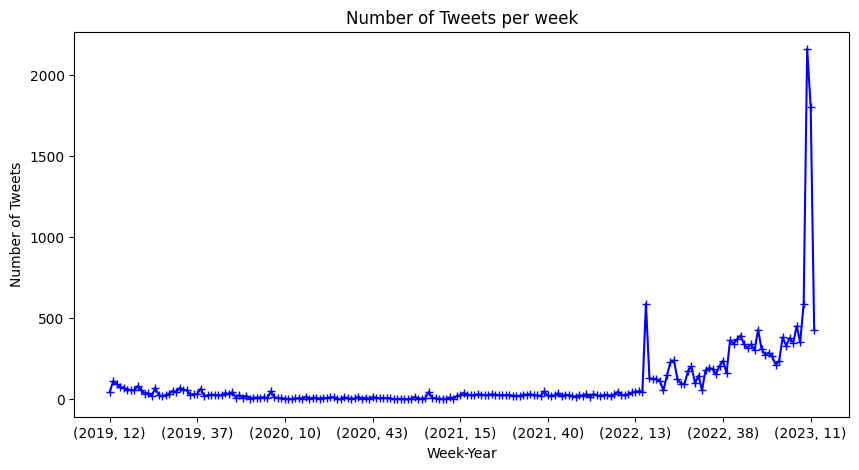

In [165]:
def make_weekly_plot(dataframe, username=None):
    #datetime
    dataframe['created_at'] = pd.to_datetime(dataframe['created_at'])
    dataframe['week'] = dataframe['created_at'].dt.isocalendar().week
    dataframe['year'] = dataframe['created_at'].dt.isocalendar().year

    #the if statement to split if there is a specified brand
    if username is None:
        df_weekly_counts = dataframe.groupby(['year', 'week'])['text'].count()
        title = 'Number of Tweets per week'
    else:
        df_weekly_counts = dataframe[dataframe['username'] == username].groupby(['year', 'week'])['text'].count()
        title = f'Number of Tweets per week for {username}'

    #plot
    fig, ax = plt.subplots(figsize=(10,5))
    df_weekly_counts.plot(ax=ax, kind='line', color='blue', marker='+')
    ax.set_xlabel('Week-Year')
    ax.set_ylabel('Number of Tweets')
    ax.set_title(title)
    plt.show()



make_weekly_plot(df_tweets)

The graph of all tweets per week does not really show any particular useful information apart that in december 2021 something tweeted a lot. The chart is not so useful because the pulled tweet data only pulls around 3600 latest tweets per account which will limit how much of the history has been download by the frequency of account tweets. McDonalds tweets often therefore their history only stays in 2023. More can be seen in using my function in the next field.

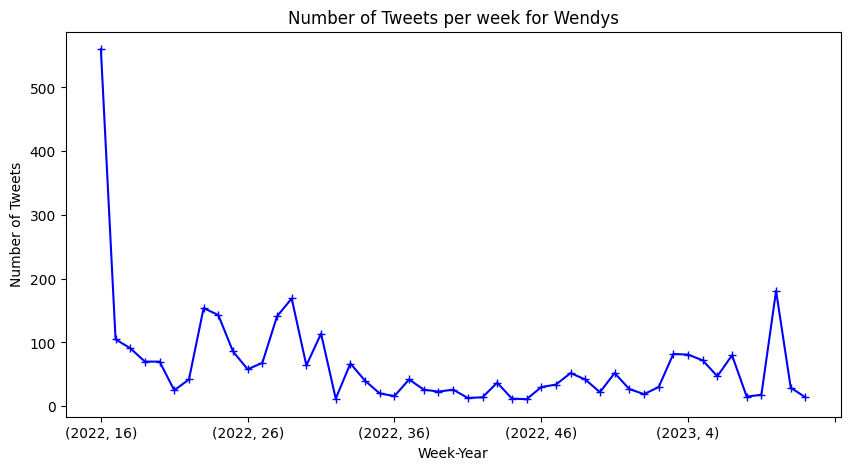

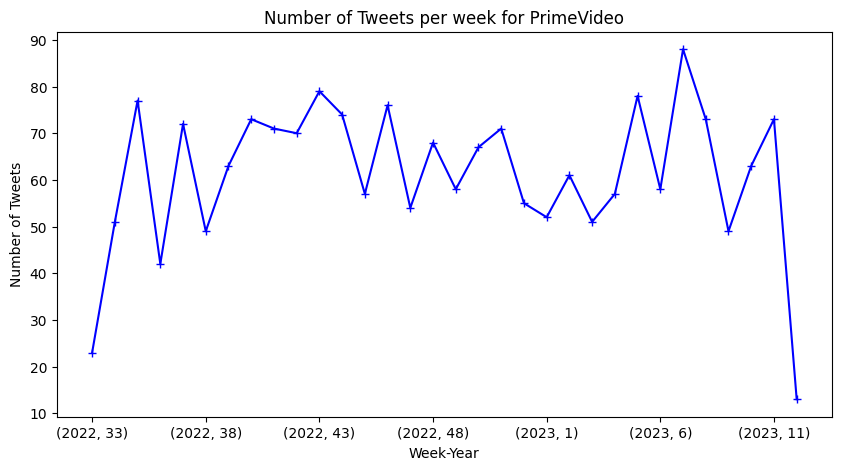

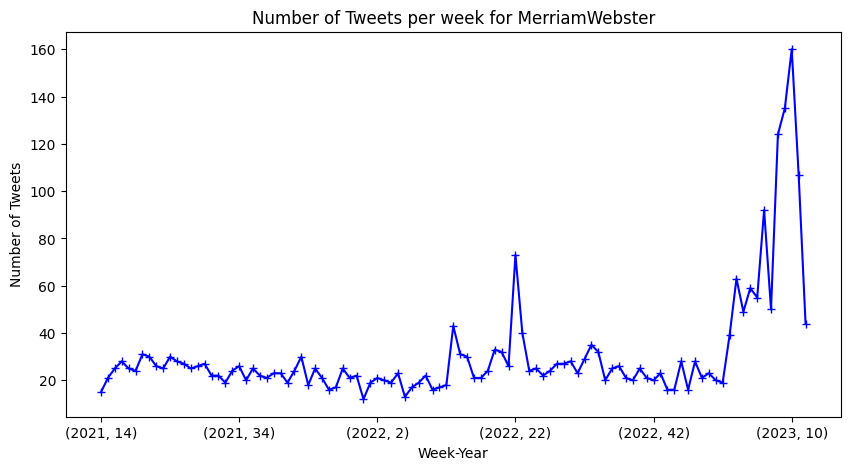

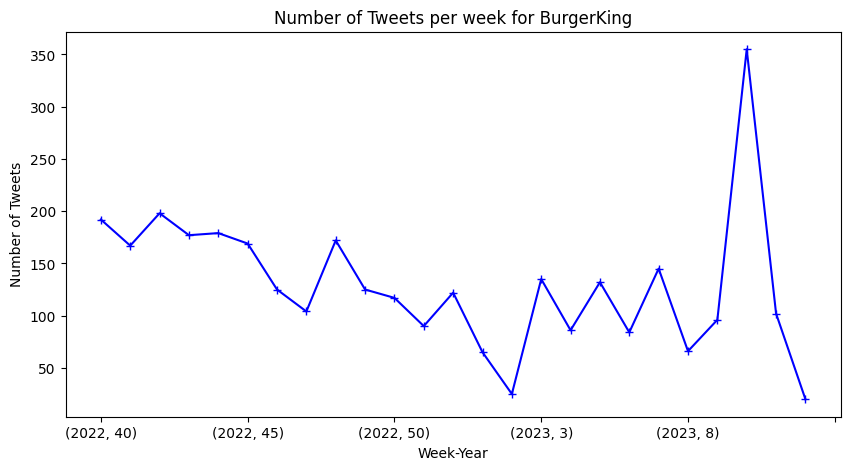

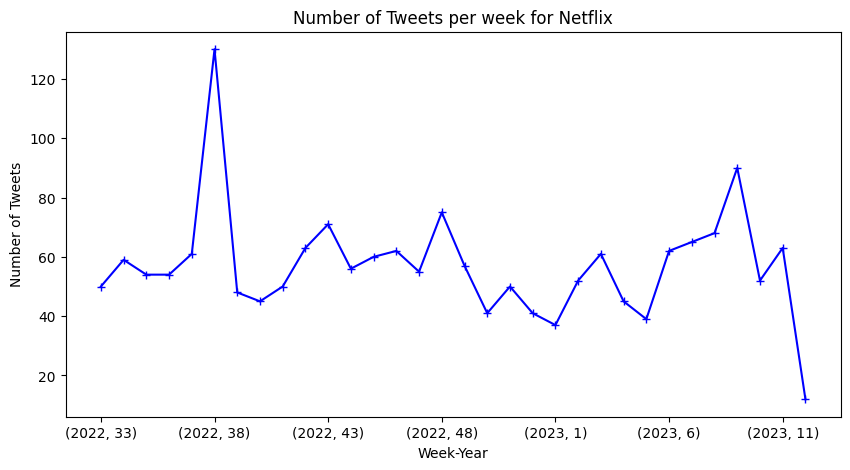

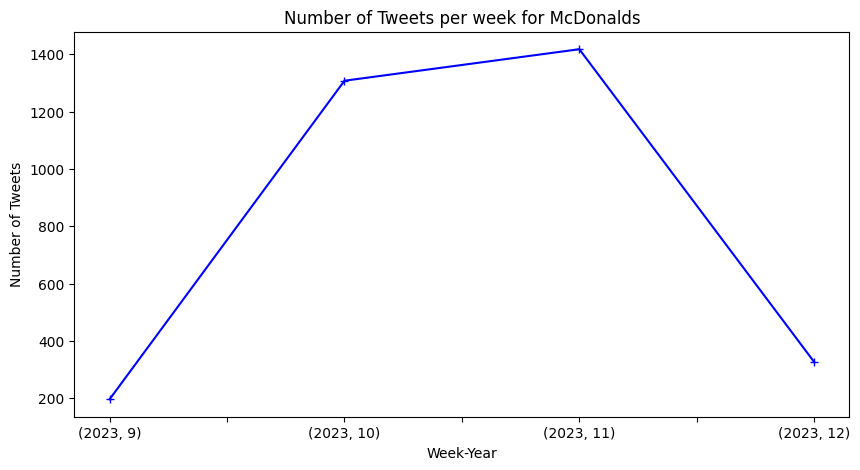

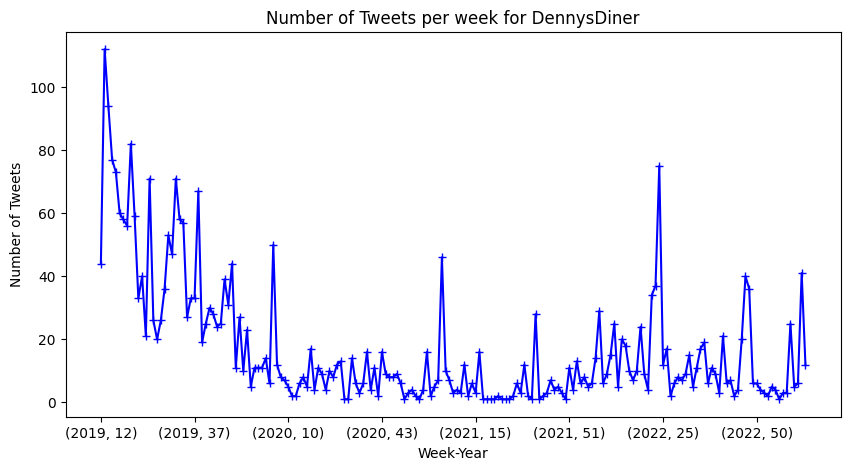

In [166]:
for brand in df_tweets['username'].unique():
    make_weekly_plot(df_tweets, brand)